# Kang et al. (2020): Isolated rib anterior-posterior bending

- Performed by: Yash Niranjan Poojary
- Reviewed by:
- Last modified : 28th december 2023
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.2.1 `

## Experiment by Kang et al. (2020)
### Summary:

The simulated outputs are compared to the references from PMHS tests reported by Kang et al.  <sup>[1]</sup>
1. Kang YS, Kwon HJ, Stammen J, Moorhouse K, Agnew AM. Biomechanical response targets of adult human ribs in frontal impacts. Annals of Biomedical Engineering. 2021 Feb;49(2):900-11. [[Article](https://link.springer.com/article/10.1007/s10439-020-02613-x)]

<!-- ![Isometric view](../_env/setup_kang_rib_s11.PNG) -->

```{figure} ../_env/setup_kang_rib_s11.PNG
---
align: center
---
Setup for isolated Rib 6 test
```


## Experiment

### Information on the subjects/specimens

|                    | **Mid-sized male** |   **Large Male**   |
|:------------------:|:------------------:|:------------------:|
| **Age categories** | **Number of Ribs** | **Number of Ribs** |
|   **Young Adult**  |         16         |          3         |
|  **Middle adult**  |         34         |          9         |
|   **Older adult**  |         50         |         13         |
|      **Total**     |       **100**      |       **25**       |

In the above table:

- **Young adult** 
    - specimens from ages 22–40 years.
- **Middle adult** 
    - specimens from ages 41–60 years.
- **Older adult** 
    - specimens from ages 61+ years.
- **Mid-sized male**: 
    - ~ 50<sup>th</sup> percentile
    - 172.7 - 177.8 cm height
    - 73.6 - 80.5 kg weight
- **Large male**: 
    - ~ 95<sup>th</sup> percentile
    - 185.4 - 189.2 cm height
    - 98.6 - 109.1 kg weight

### Loading and Boundary Conditions
### Boundary Conditions
- `Coordinate system `              : aligned with Global in simulations
> **Setup**
> - ***Load case***                     : Anterior-Posterior bending
> - ***supports***                    :  The brackets and the fixture base modelled with `MAT_RIGID`.
> - ***Potting Cups***                  : 
>    * `MAT_ELASTIC` solids with $E=0.9Gpa$, $density=1.12 g/cm^3$ and $pr=0.3$
>    * The anterior  and posterior ends of the rib are in the same plane.
>    * The end of the rib was positioned at the centre of the potting. 
>
> **Constraints and Loading** 
> - ***Loading***            : `*BOUNDARY_PRESCRIBED_MOTION_RIGID` anterior-posterior direction loading at a velocity of around 2m/s is prescribed.
> - ***Constraint***           :  
>   * `*CONSTRAINT_SHELL_IN_SOLID_PENALTY` used for the potting. 
>   * The posterior potting is fixed in all direction, and the anterior is free to move along X.
>   * The pots are only allowed to rotate freely about the y-axis, the anterior bracket is allowed to move in the Z-axis and the posterior bracted is fixed in all directions.

### Responses recorded
- Reaction force is measured at the posterior end.
- Displacement of the anterior potting

The reference values from the paper were digitalised and are incuded in the notebook. The data corresponds to the unnormalised corridors.


In [12]:
import os
import glob
# for data analysis
import pandas as pd
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)


In [2]:
binout_path_sim={}
result_output_dir={}

Ribs=["Rib4","Rib5","Rib6","Rib7"]

figures_dir = "../data/processed/SAFER11.0/figures/"
processed_data_dir = f"../data/processed/SAFER11.0"
experiment_dir= "../data/experiment_data/"

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)

for Rib in Ribs:
    binout_path_sim[Rib] = Rib
    result_output_dir[Rib] = os.path.join(processed_data_dir, binout_path_sim[Rib])
    if not os.path.exists(result_output_dir[Rib]): 
        os.makedirs(result_output_dir[Rib])


## Postprocessing with dynasaur

In [3]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [5]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/01_impactor_IDs.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/03_calculation_kang_2020.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def"]

In [6]:
sim_output={}
for rib in Ribs:
    sim_50F = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[rib] +'/binout*')
    commands = sim_50F.get_defined_calculation_procedures()
    print(commands)
    for command in sim_50F.get_defined_calculation_procedures():
        sim_50F.calculate(command)
    sim_50F.write_CSV(result_output_dir[rib], filename="Dynasaur_output.csv")
    sim_output[rib]=pd.read_csv(os.path.join(result_output_dir[rib],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/03_calculation_kang_2020.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/01_impactor_IDs.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[READ BINOUT]	read bndout data ...
[READ BINOUT]	done reading bndout!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[{'visualization': 'potting_A_Disp_z', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'potting_P_Disp_z', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'potting_P_coor_z', 'x_label': 'time', 'y_label': 'coordinate'}, {'visualization': 'potting_A_coor_z', 'x_label': 'time', 'y_label': 'coordinate'}, {'visualization': 'potting_Force', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'MODEL_Added_Mass', 'x_label': 'time', 'y_label': 'mass'}, {'visualization': 'MODEL_Total_Energy', 'x_labe

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0\Rib4
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0\Rib4\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/03_calculation_kang_2020.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0\Rib5
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0\Rib5\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/03_calculation_kang_2020.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0\Rib6
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0\Rib6\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/03_calculation_kang_2020.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER11.0\Rib7
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER11.0\Rib7\Dynasaur_output.csv


In [7]:
# Import the processed data for visualization as pandas Dataframe
simData_rib4 = pd.read_csv(result_output_dir[Ribs[0]]+"\Dynasaur_output.csv", delimiter=';',na_values='-',  header = [0,1,2,3])
simData_rib5 = pd.read_csv(result_output_dir[Ribs[1]]+"\Dynasaur_output.csv", delimiter=';',na_values='-',  header = [0,1,2,3])
simData_rib6 = pd.read_csv(result_output_dir[Ribs[2]]+"\Dynasaur_output.csv", delimiter=';', na_values='-', header = [0,1,2,3])
simData_rib7 = pd.read_csv(result_output_dir[Ribs[3]]+"\Dynasaur_output.csv", delimiter=';', na_values='-', header = [0,1,2,3])


normalized_length_rib4=((abs(simData_rib4.potting.P_coor_z.coordinate.millimeter[0]-simData_rib4.potting.A_coor_z.coordinate.millimeter[0])-
                        abs(simData_rib4.potting.P_coor_z.coordinate.millimeter-simData_rib4.potting.A_coor_z.coordinate.millimeter))/
                        abs(simData_rib4.potting.P_coor_z.coordinate.millimeter[0]-simData_rib4.potting.A_coor_z.coordinate.millimeter[0]))*100

normalized_length_rib5=((abs(simData_rib5.potting.P_coor_z.coordinate.millimeter[0]-simData_rib5.potting.A_coor_z.coordinate.millimeter[0])-
                        abs(simData_rib5.potting.P_coor_z.coordinate.millimeter-simData_rib5.potting.A_coor_z.coordinate.millimeter))/
                        abs(simData_rib5.potting.P_coor_z.coordinate.millimeter[0]-simData_rib5.potting.A_coor_z.coordinate.millimeter[0]))*100

normalized_length_rib6=((abs(simData_rib6.potting.P_coor_z.coordinate.millimeter[0]-simData_rib6.potting.A_coor_z.coordinate.millimeter[0])-
                        abs(simData_rib6.potting.P_coor_z.coordinate.millimeter-simData_rib6.potting.A_coor_z.coordinate.millimeter))/
                        abs(simData_rib6.potting.P_coor_z.coordinate.millimeter[0]-simData_rib6.potting.A_coor_z.coordinate.millimeter[0]))*100

normalized_length_rib7=((abs(simData_rib7.potting.P_coor_z.coordinate.millimeter[0]-simData_rib7.potting.A_coor_z.coordinate.millimeter[0])-
                        abs(simData_rib7.potting.P_coor_z.coordinate.millimeter-simData_rib7.potting.A_coor_z.coordinate.millimeter))/
                        abs(simData_rib7.potting.P_coor_z.coordinate.millimeter[0]-simData_rib7.potting.A_coor_z.coordinate.millimeter[0]))*100

experiment=pd.read_csv(os.path.join(experiment_dir,'Kang_2020_Male_Middle_age.csv'),delimiter=';',header=None)

### Force vs Normalized Displacement - Middle aged males

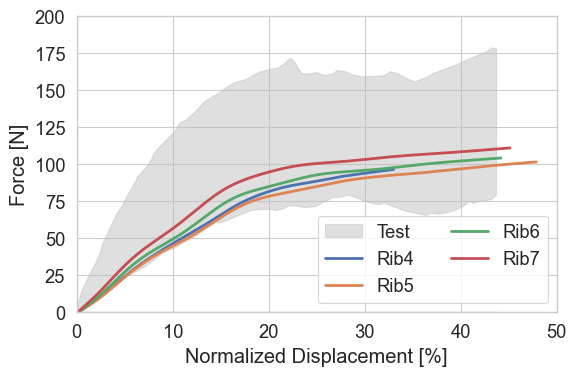

In [8]:
plt_v11,axs=plt.subplots(figsize=(6,4))
axs.fill_between(experiment[0],experiment[1], color='silver',alpha=0.5, label = "Test")
axs.plot(normalized_length_rib4,simData_rib4.potting.Force.force.iloc[:,0]*1000,linewidth=2, label = "Rib4")
axs.plot(normalized_length_rib5,simData_rib5.potting.Force.force.iloc[:,0]*1000,linewidth=2, label = "Rib5")
axs.plot(normalized_length_rib6,simData_rib6.potting.Force.force.iloc[:,0]*1000,linewidth=2, label = "Rib6")
axs.plot(normalized_length_rib7,simData_rib7.potting.Force.force.iloc[:,0]*1000,linewidth=2, label = "Rib7")

plt.xlim([0,50])
plt.ylim([0,200])
axs.set_xlabel("Normalized Displacement [%]") 
axs.set_ylabel("Force [N]")
axs.legend(loc="lower right",ncols=2)
plt_v11.tight_layout()

## Energy Plots

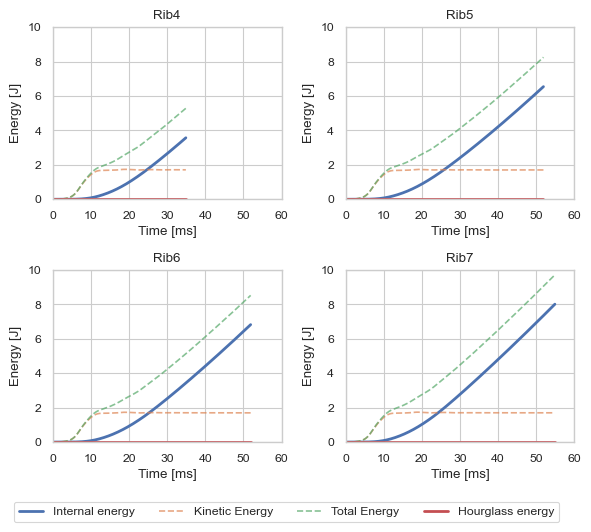

In [20]:
fig_eny, axs = plt.subplots(nrows=2, ncols=2,figsize=(6,5))
i=0
for ax in axs.flat:
    ax.plot(sim_output[Ribs[i]].MODEL.Internal_Energy.time,sim_output[Ribs[i]].MODEL.Internal_Energy.energy,linewidth=2)
    ax.plot(sim_output[Ribs[i]].MODEL.Kinetic_Energy.time,sim_output[Ribs[i]].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Ribs[i]].MODEL.Total_Energy.time,sim_output[Ribs[i]].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Ribs[i]].MODEL.Hourglass_Energy.time,sim_output[Ribs[i]].MODEL.Hourglass_Energy.energy,linewidth=2)
    ax.set(title="{}".format(Ribs[i]),xlabel='Time [ms]',ylabel='Energy [J]',xlim=[0,60],ylim=[0,10])
    i=i+1

fig_eny.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.95,0),ncols=4);
fig_eny.tight_layout()

In [14]:
plt_v11.savefig(os.path.join(figures_dir, 'Figure_v11.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")